Import Necessary Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Split the dataset into train and test set

In [ ]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

Using pyplot to see the Images

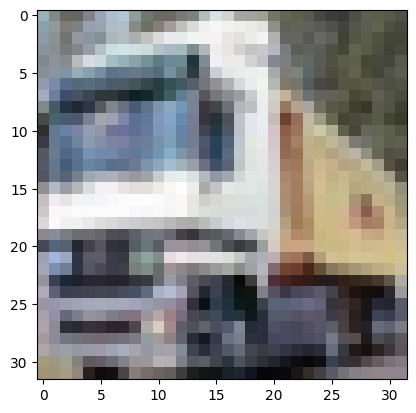

In [ ]:
plt.imshow(x_train[1])

Define the Classes used for classification

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Verify the Dataset by plotting some images

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

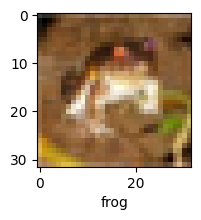

In [ ]:
plot_sample(x_train,y_train,0)

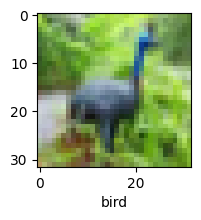

In [ ]:
plot_sample(x_train,y_train,6)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
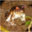

In [ ]:
x_train[0]

Apply Scaling technique to get better accuracy

In [ ]:
x_train = x_train/255
x_test = x_test/255

Build an Simple ANN model

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.8107 - accuracy: 0.3551
Epoch 2/5
1563/1563 [==============================] - 153s 98ms/step - loss: 1.6218 - accuracy: 0.4256
Epoch 3/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.5422 - accuracy: 0.4570
Epoch 4/5
1563/1563 [==============================] - 143s 92ms/step - loss: 1.4810 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 143s 92ms/step - loss: 1.4307 - accuracy: 0.4958



Test the Model with Test dataset

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)

313/313 [==============================] - 9s 28ms/step


array([[0.3859873 , 0.42772388, 0.65854114, 0.8956178 , 0.37100297,
        0.7766537 , 0.860676  , 0.0725352 , 0.6656512 , 0.14842041],
       [0.8668744 , 0.85659564, 0.25393242, 0.11260019, 0.23672512,
        0.08376016, 0.0288455 , 0.14657724, 0.9845635 , 0.9625639 ],
       [0.96248955, 0.8533058 , 0.34361216, 0.15871438, 0.25374356,
        0.15653996, 0.01155593, 0.29547793, 0.99044484, 0.85589933],
       [0.8856699 , 0.39385194, 0.7233657 , 0.21467066, 0.5856087 ,
        0.25997812, 0.0281175 , 0.57338303, 0.9511204 , 0.47940427],
       [0.20346576, 0.0645542 , 0.7648196 , 0.7266135 , 0.92393786,
        0.8140167 , 0.92021495, 0.44272906, 0.40601447, 0.06722504]],
      dtype=float32)

In [ ]:
y_pred[0]

array([0.3859873 , 0.42772388, 0.65854114, 0.8956178 , 0.37100297,
       0.7766537 , 0.860676  , 0.0725352 , 0.6656512 , 0.14842041],
      dtype=float32)

Make a Classification Report to check the Model Performance

In [ ]:
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification Report: \n',classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.49      0.53      1000
           1       0.69      0.48      0.57      1000
           2       0.42      0.28      0.34      1000
           3       0.38      0.20      0.26      1000
           4       0.50      0.29      0.37      1000
           5       0.36      0.43      0.39      1000
           6       0.42      0.70      0.53      1000
           7       0.55      0.57      0.56      1000
           8       0.46      0.77      0.57      1000
           9       0.52      0.57      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.46     10000
weighted avg       0.49      0.48      0.46     10000



Build an CNN model

In [ ]:
cnn = models.Sequential([
    #Convolution layer
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    #Dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
  ])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 102s 64ms/step - loss: 1.4368 - accuracy: 0.4848
Epoch 2/10
1563/1563 [==============================] - 99s 64ms/step - loss: 1.0897 - accuracy: 0.6181
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9554 - accuracy: 0.6643
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8682 - accuracy: 0.6993
Epoch 5/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7910 - accuracy: 0.7232
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7300 - accuracy: 0.7447
Epoch 7/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.6745 - accuracy: 0.7643
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6307 - accuracy: 0.7796
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.5834 - accuracy: 0.7964
Epoch 10/10
1563/1563 [==============================] - 56s 36

Evaluate the model with test dataset

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.9247 - accuracy: 0.7086


[0.9246719479560852, 0.7085999846458435]

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

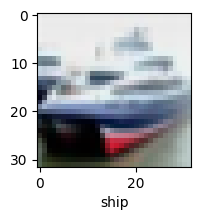

In [ ]:
plot_sample(x_test,y_test,1)

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[1.5678867e-03, 1.1092886e-04, 3.0802628e-03, 6.6112810e-01,
        3.2160652e-04, 3.0663460e-01, 7.1986588e-03, 3.9943261e-03,
        1.5430615e-02, 5.3305755e-04],
       [1.0066337e-03, 2.4623211e-02, 1.6683186e-08, 2.1613049e-08,
        4.4889365e-08, 3.6724124e-11, 3.3030804e-11, 9.3091018e-10,
        9.7359717e-01, 7.7289710e-04],
       [1.2042645e-02, 6.4084607e-01, 1.3826574e-04, 1.9697868e-04,
        9.2977309e-05, 7.6530041e-06, 6.4443375e-05, 8.7329689e-05,
        3.4334698e-01, 3.1766458e-03],
       [9.6043670e-01, 8.0555072e-03, 1.1829604e-02, 4.0967783e-04,
        3.1900295e-04, 1.8815108e-06, 5.5675791e-04, 2.4000235e-04,
        1.6152799e-02, 1.9981361e-03],
       [5.1852351e-07, 3.3731721e-06, 5.4163807e-03, 5.5150008e-03,
        6.7020148e-01, 1.1265241e-03, 3.1772423e-01, 2.8849257e-07,
        1.2234222e-05, 4.1060055e-08]], dtype=float32)

In [ ]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

Create an Classification report to verify the model performance

In [ ]:
print("Classification Report:\n",classification_report(y_test,y_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      1000
           1       0.80      0.82      0.81      1000
           2       0.62      0.64      0.63      1000
           3       0.51      0.55      0.53      1000
           4       0.74      0.56      0.63      1000
           5       0.64      0.58      0.61      1000
           6       0.76      0.77      0.76      1000
           7       0.73      0.81      0.77      1000
           8       0.84      0.79      0.81      1000
           9       0.77      0.79      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

